In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
from lab_utils_common import dlc
from lab_neurons_utils import plt_prob_1d, sigmoidnp, plt_linear, plt_logistic
plt.style.use('./deeplearning.mplstyle')
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR) #apenas mostrar erro critico
tf.autograph.set_verbosity(0)

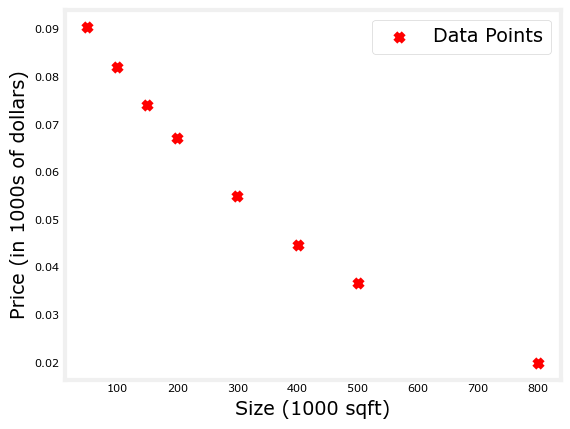

In [2]:
X_train = np.array([[50.0], [100.0], [150.0], [200.0], [300.0], [400.0], [500.0], [800.0]], dtype=np.float32)           #(size in 1000 square feet)
Y_train = np.array([[0.0905], [0.0820], [0.0741], [0.0671], [0.0549], [0.0448], [0.0368], [0.0200]], dtype=np.float32)       #(price in 1000s of dollars)

fig, ax = plt.subplots(1,1)
ax.scatter(X_train, Y_train, marker='x', c='r', label="Data Points")
ax.legend( fontsize='xx-large')
ax.set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
ax.set_xlabel('Size (1000 sqft)', fontsize='xx-large')
plt.show()

In [10]:

Y_transformed = np.log(Y_train)


print("Dados transformados:")
for i in range(len(X_train)):
    print(f"x={X_train[i][0]:.1f}, ln(y)-ln(x)={Y_transformed[i][0]:.4f}")

Dados transformados:
x=50.0, ln(y)-ln(x)=-2.4024
x=100.0, ln(y)-ln(x)=-2.5010
x=150.0, ln(y)-ln(x)=-2.6023
x=200.0, ln(y)-ln(x)=-2.7016
x=300.0, ln(y)-ln(x)=-2.9022
x=400.0, ln(y)-ln(x)=-3.1055
x=500.0, ln(y)-ln(x)=-3.3023
x=800.0, ln(y)-ln(x)=-3.9120


In [11]:
# Criar modelo linear para prever ln(y)
linear_layer = tf.keras.layers.Dense(units=1, activation='linear', input_shape=(1,))

# Modelo simples
model = tf.keras.Sequential([
    linear_layer
])

# Compilar o modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              loss='mean_squared_error')

# Treinar para prever ln(y)
history = model.fit(X_train, Y_transformed, epochs=1000, verbose=0)

In [12]:
# Obter pesos treinados
w, b = linear_layer.get_weights()

# w[0,0] é o coeficiente angular (será negativo)
# b[0] é o intercepto (será ln(y_inicial))
w_trained = w[0,0]
b_trained = b[0]

print(f"w (coeficiente): {w_trained:.6f}")
print(f"b (ln(y_inicial)): {b_trained:.6f}")
print(f"y_inicial: {np.exp(b_trained):.6f}")

w (coeficiente): -0.002639
b (ln(y_inicial)): -1.995671
y_inicial: 0.135922


In [13]:
# Prever ln(y)
predictions_log = model.predict(X_train)

# Converter de volta para y
predictions = np.exp(predictions_log)

# Ou usar a fórmula diretamente
y_initial = np.exp(b_trained)
predictions_direct = y_initial * np.exp(-w_trained * X_train)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


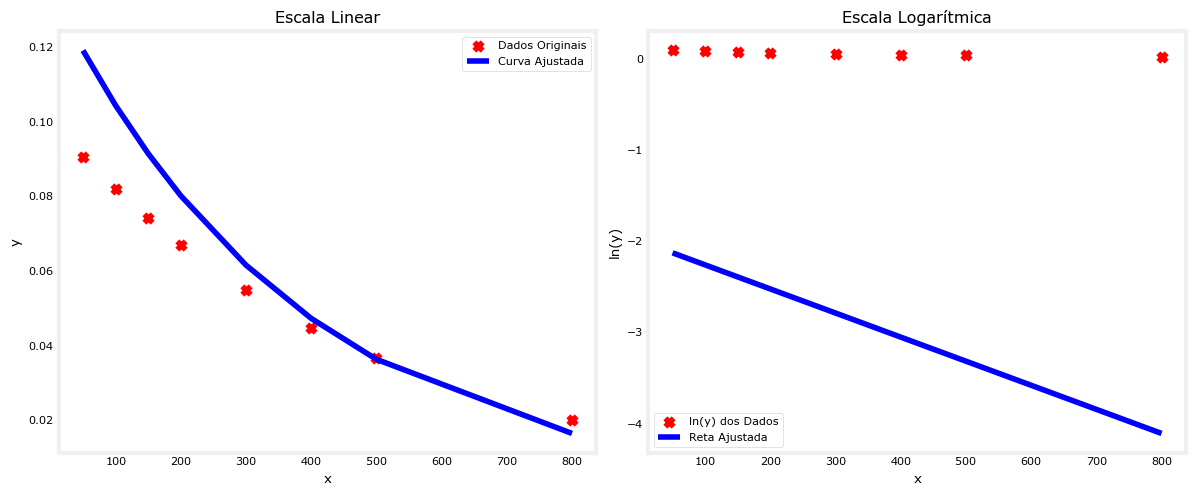

In [14]:
# Plot dos dados originais e da curva ajustada
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot em escala linear
ax1.scatter(X_train, Y_train, marker='x', c='r', label="Dados Originais")
ax1.plot(X_train, predictions, 'b-', label="Curva Ajustada")
ax1.set_ylabel('y', fontsize='large')
ax1.set_xlabel('x', fontsize='large')
ax1.legend()
ax1.set_title('Escala Linear')

# Plot em escala semi-log (ln(y) vs x)
ax2.scatter(X_train, Y_train, marker='x', c='r', label="ln(y) dos Dados")
ax2.plot(X_train, predictions_log, 'b-', label="Reta Ajustada")
ax2.set_ylabel('ln(y)', fontsize='large')
ax2.set_xlabel('x', fontsize='large')
ax2.legend()
ax2.set_title('Escala Logarítmica')

plt.tight_layout()
plt.show()

função sem ativação

In [4]:
linear_layer = tf.keras.layers.Dense(units=1, activation = 'linear', )

In [5]:
linear_layer.get_weights()

[]

In [6]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)

tf.Tensor([[0.]], shape=(1, 1), dtype=float32)


In [7]:
w, b= linear_layer.get_weights()
print(f"w = {w}, b={b}")

w = [[-0.29]], b=[0.]


In [9]:
set_w = np.array([[200]])
set_b = np.array([100])

# set_weights takes a list of numpy arrays
linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


In [10]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)
alin = np.dot(set_w,X_train[0].reshape(1,1)) + set_b
print(alin)

tf.Tensor([[100.]], shape=(1, 1), dtype=float32)
[[100.]]


In [11]:
prediction_tf = linear_layer(X_train)
prediction_np = np.dot( X_train, set_w) + set_b

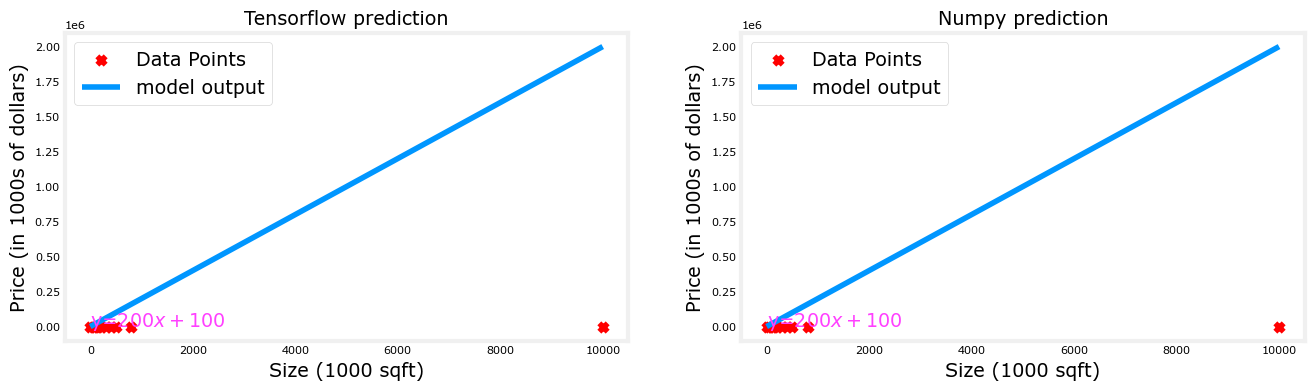

In [12]:
plt_linear(X_train, Y_train, prediction_tf, prediction_np)


Neuron with Sigmoid activation

In [11]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix

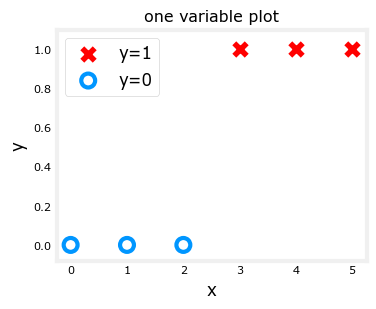

In [12]:
pos = Y_train == 1
neg = Y_train == 0

fig,ax = plt.subplots(1,1,figsize=(4,3))
ax.scatter(X_train[pos], Y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0", facecolors='none', 
              edgecolors=dlc["dlblue"],lw=3)

ax.set_ylim(-0.08,1.1)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('one variable plot')
ax.legend(fontsize=12)
plt.show()

In [13]:
model = Sequential(
    [
        tf.keras.layers.Dense(1, input_dim=1,  activation = 'sigmoid', name='L1')
    ]
)

c:\Users\chena\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
logistic_layer = model.get_layer('L1')
w,b = logistic_layer.get_weights()
print(w,b)
print(w.shape,b.shape)

[[0.51]] [0.]
(1, 1) (1,)


In [16]:
set_w = np.array([[2]])
set_b = np.array([-4.5])
# set_weights takes a list of numpy arrays
logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [17]:
a1 = model.predict(X_train[0].reshape(1,1))
print(a1)
alog = sigmoidnp(np.dot(set_w,X_train[0].reshape(1,1)) + set_b)
print(alog)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
[[0.01]]
[[0.01]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━

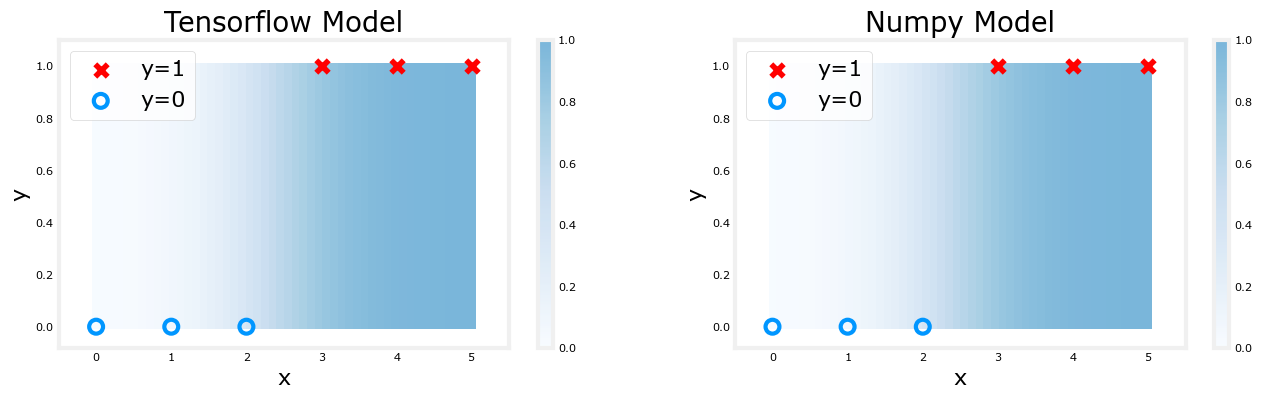

In [18]:
plt_logistic(X_train, Y_train, model, set_w, set_b, pos, neg)